In [2]:
import requests
from flask import Flask , request , jsonify
import pyodbc
import pymongo
from pymongo import MongoClient
from bson.objectid import ObjectId
import threading
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

2025-08-28 00:23:12.877 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-28 00:23:12.880 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-28 00:23:14.398 
  command:

    streamlit run C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-28 00:23:14.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-28 00:23:14.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-28 00:23:14.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-28 0

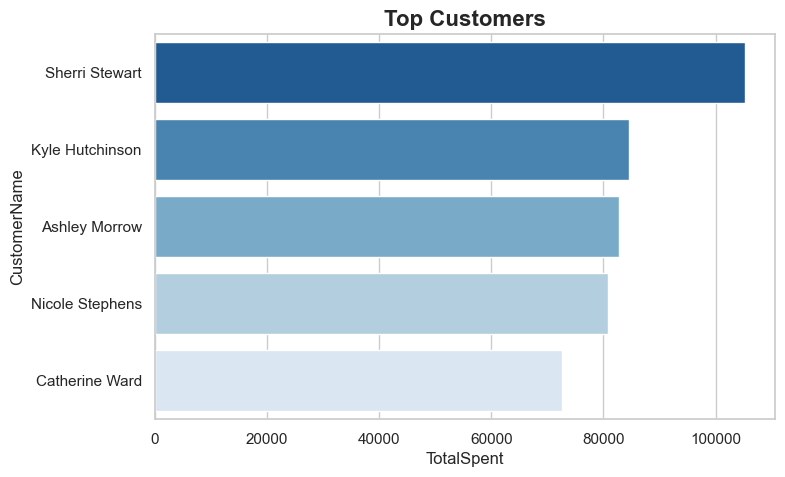

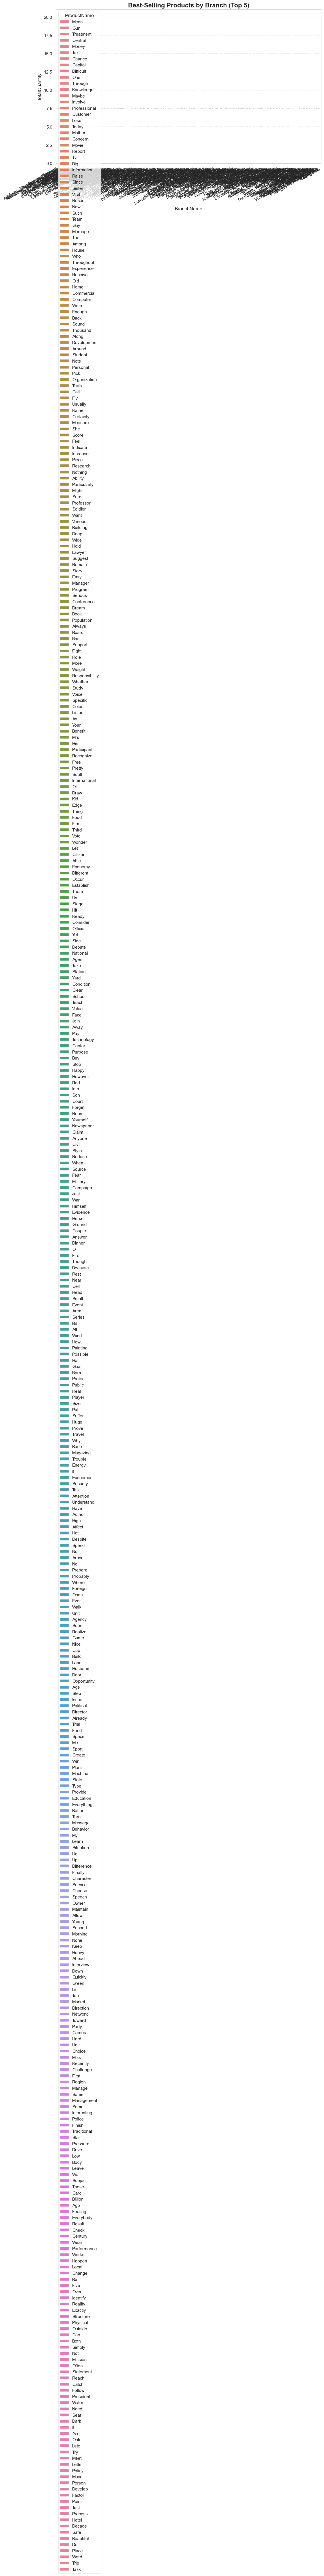

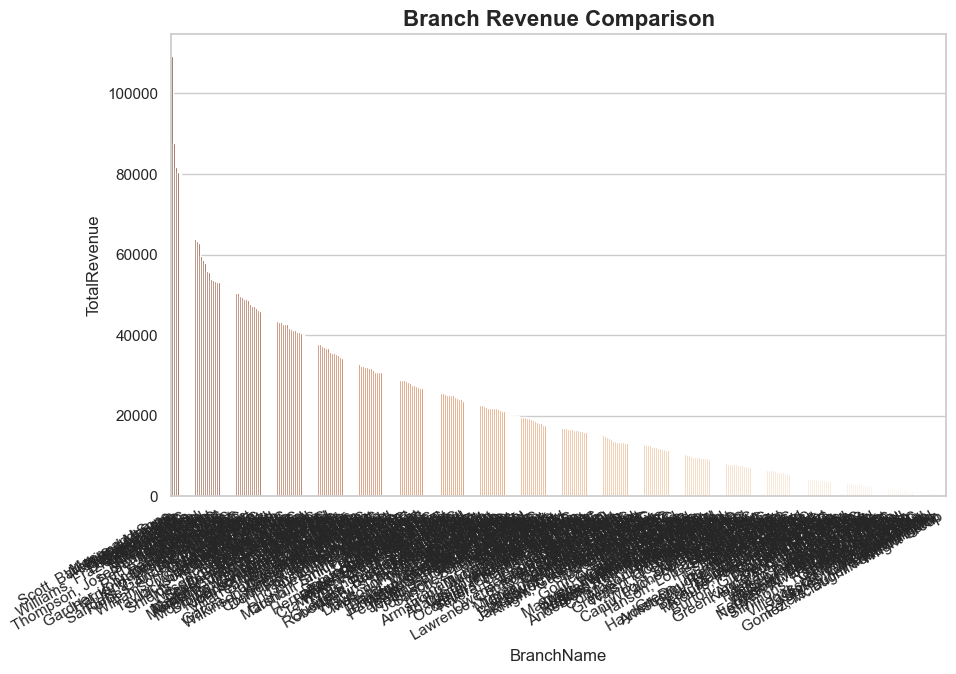

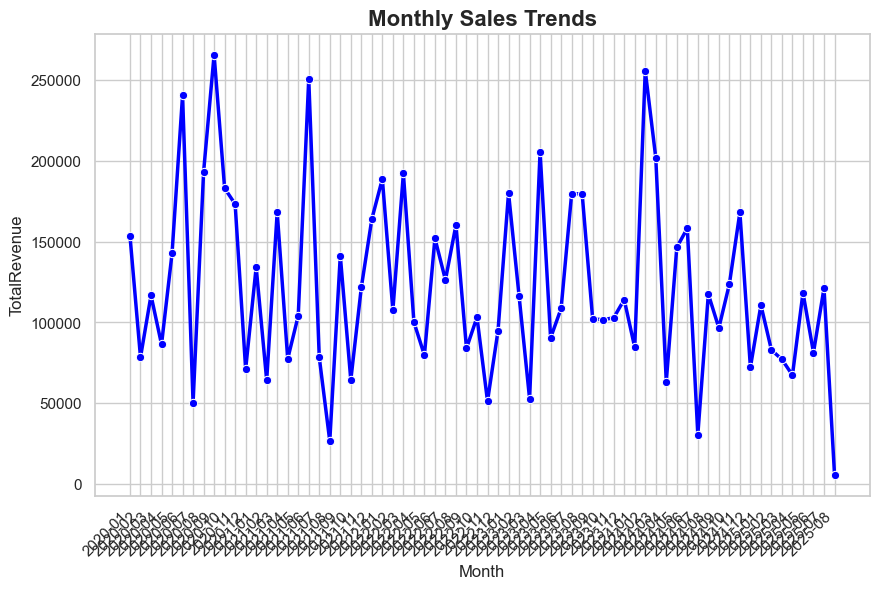

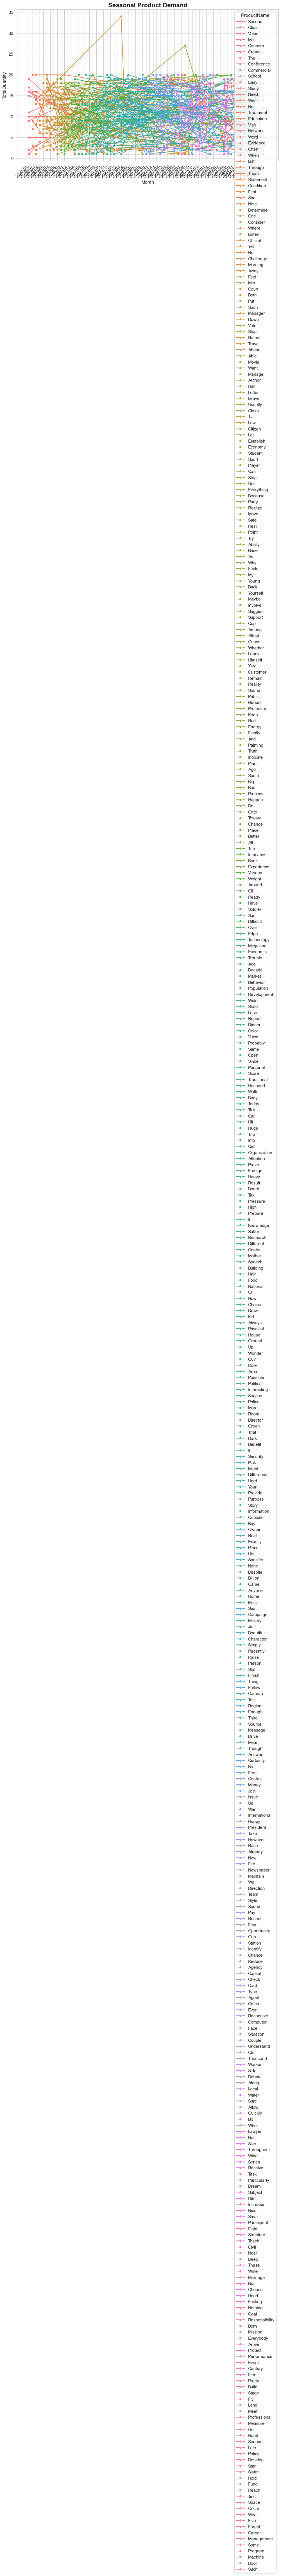

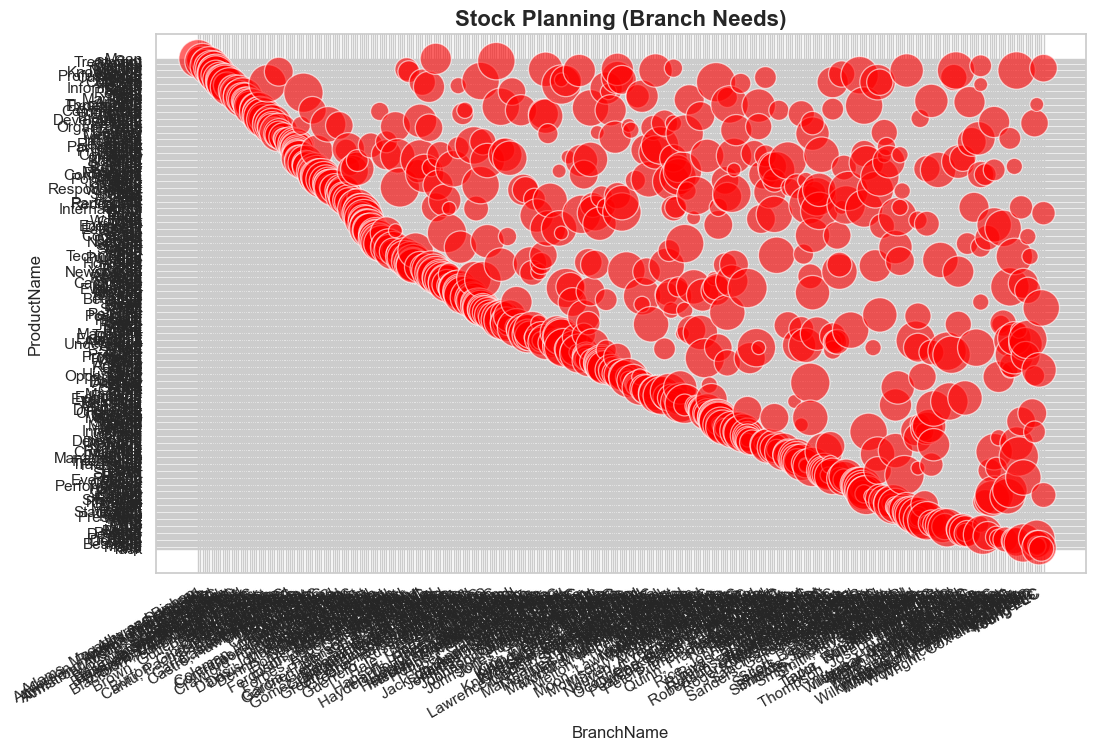

In [ ]:
# -----------------------------
# Connect to MongoDB
# -----------------------------
client = MongoClient("mongodb://localhost:27017/")
db = client["MyDatabase"]

st.set_page_config(page_title="Retail Data Dashboard", layout="wide")
st.title("📊 Retail Data Analysis Dashboard")

sns.set_theme(style="whitegrid")  # Cleaner look

# =============================
# Sidebar Filters
# =============================
branches = db["BranchRevenueComparison"].distinct("BranchName")
products = db["BestSellingProducts"].distinct("ProductName")
customers = db["TopCustomers"].distinct("CustomerName")

selected_branch = st.sidebar.selectbox("📍 Select Branch", ["All"] + branches)
selected_product = st.sidebar.selectbox("📦 Select Product", ["All"] + products)
selected_customer = st.sidebar.selectbox("👤 Select Customer", ["All"] + customers)

# -----------------------------
# 1. Top Customers
# -----------------------------
st.header("Top Customers (Highest Spenders)")
top_customers = list(db["TopCustomers"].find({}, {"_id": 0}))
if top_customers:
    df_top = pd.DataFrame(top_customers)
    if selected_customer != "All":
        df_top = df_top[df_top["CustomerName"] == selected_customer]

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x="TotalSpent", y="CustomerName", data=df_top, palette="Blues_r", ax=ax)
    ax.set_title("Top Customers", fontsize=16, fontweight="bold")
    st.pyplot(fig)


# -----------------------------
# 2. Best-Selling Products
# -----------------------------
st.header("Best-Selling Products (Overall)")
best_products = list(db["BestSellingProducts"].find({}, {"_id": 0}))
if best_products:
    df_products = pd.DataFrame(best_products)
    if selected_product != "All":
        df_products = df_products[df_products["ProductName"] == selected_product]

    df_products = df_products.head(10)  # Show only Top 10
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x="ProductName", y="TotalQuantity", data=df_products, palette="Greens_r", ax=ax)
    ax.set_title("Best-Selling Products", fontsize=16, fontweight="bold")
    plt.xticks(rotation=30, ha="right")
    st.pyplot(fig)


# -----------------------------
# 3. Best-Selling Products by Branch
# -----------------------------
st.header("Best-Selling Products by Branch (Top 5)")
branch_products = list(db["BestSellingProductsByBranch"].find({}, {"_id": 0}))
if branch_products:
    